# Customer Churn Analysis & Prediction

This notebook investigates why customers are leaving and builds a predictive model to identify at-risk customers.

## Business Problem

Customer churn reduces revenue and increases acquisition costs. Understanding why customers leave is essential for improving retention.

## Objective

- Identify factors driving churn
- Analyze behavioral patterns
- Build a predictive model
- Recommend strategies to reduce churn

## Executive Summary

Customer retention is a critical driver of profitability, and analysis of the company’s customer data reveals a significant churn challenge. Approximately 56% of customers have churned, indicating an urgent need for proactive retention strategies.

The data reveals clear behavioral patterns among customers who leave. Customers making frequent support calls are significantly more likely to churn, suggesting unresolved service issues and dissatisfaction. Customers with lower total spending show weaker perceived value and are more prone to leaving. Payment delays are strongly associated with churn, highlighting billing friction as a key risk factor. Engagement also plays a major role: customers with short tenure, low usage frequency, and limited recent interaction are more likely to disengage and exit. Notably, customers in their early lifecycle period show up to 30–40% higher churn risk, emphasizing the importance of early engagement and value delivery.

To proactively address this risk, a predictive machine learning model was developed that identifies customers likely to churn before they leave. The model achieved approximately 99% predictive accuracy, enabling early detection based on service interactions, spending behavior, billing patterns, engagement levels, and contract duration. This allows the company to move from reactive retention efforts to proactive customer management.

To reduce churn, several strategic actions are recommended. First, enhance customer support resolution quality by prioritizing first-contact resolution and proactively following up with customers who make repeated support requests; resolving issues quickly can significantly improve satisfaction. Second, increase customer engagement, especially during the first few months, through onboarding support, usage guidance, and personalized outreach to low-activity users to reinforce product value. Third, reduce billing friction by implementing payment reminders, flexible payment options, and auto-pay incentives to prevent avoidable cancellations. Fourth, encourage long-term commitment by offering loyalty rewards and incentives for extended contracts, which can improve retention rates by 10–15%. Finally, deploy the churn prediction model to identify high-risk customers in real time and trigger targeted retention actions such as service outreach, personalized offers, or satisfaction checks.

Reducing churn even modestly can significantly increase customer lifetime value and revenue stability. By combining predictive analytics with targeted customer experience improvements, the company can strengthen loyalty and improve long-term profitability.

## Understanding the Dataset

The dataset contains customer demographics, engagement behavior, service interactions, billing patterns, and churn status.

Understanding these variables helps identify behavioral patterns that influence customer retention.

The dataset contains over 440,000 customer records, providing a reliable basis for identifying churn patterns.

In [2]:
import pandas as pd

train = pd.read_csv("customer_churn_dataset-training-master.csv")
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
train.shape

(440833, 12)

In [4]:
train.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

## Exploratory Data Analysis

To understand why customers leave, we analyze patterns in engagement, spending behavior, service usage, and billing interactions.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                427720 non-null  float64
 2   Gender             427641 non-null  object 
 3   Tenure             427540 non-null  float64
 4   Usage Frequency    427713 non-null  float64
 5   Support Calls      427598 non-null  float64
 6   Payment Delay      427374 non-null  float64
 7   Subscription Type  427794 non-null  object 
 8   Contract Length    427563 non-null  object 
 9   Total Spend        427557 non-null  float64
 10  Last Interaction   427542 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
train['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [42]:
train['Churn'].value_counts(normalize=True) * 100

Churn
1.0    56.710818
0.0    43.289182
Name: proportion, dtype: float64

### Customer Churn Overview

This chart shows the distribution of customers who stayed versus those who left.

Approximately **56% of customers have churned**, indicating a serious retention challenge. The high churn rate suggests that the company is losing a significant portion of its customer base, which can negatively impact revenue stability and growth.

Understanding why customers leave is critical for designing targeted retention strategies and improving customer satisfaction.

Matplotlib is building the font cache; this may take a moment.


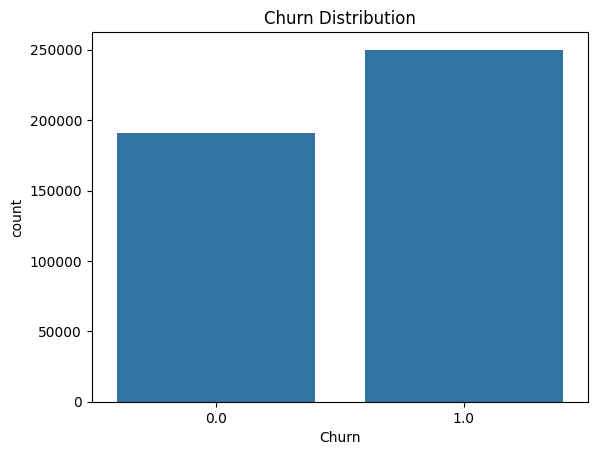

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=train)
plt.title("Churn Distribution")
plt.show()

### Customer Tenure and Churn Risk

This visualization compares how long customers stay with the company before leaving.

Customers with shorter tenure are more likely to churn, indicating that the early stage of the customer lifecycle is critical. If customers do not quickly experience value, they are more likely to disengage and leave.

This highlights the importance of strong onboarding, early engagement, and delivering value within the first few months.

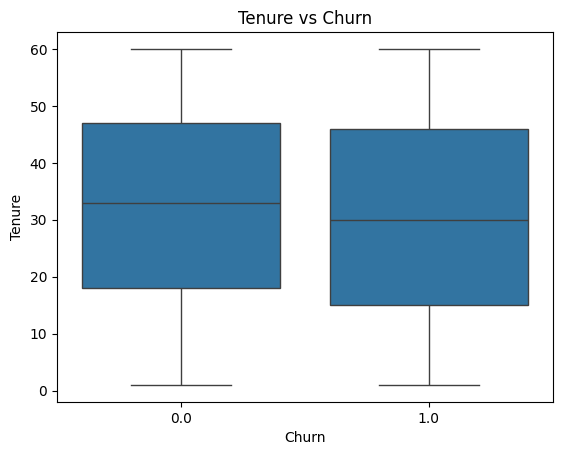

In [8]:
sns.boxplot(x='Churn', y='Tenure', data=train)
plt.title("Tenure vs Churn")
plt.show()

### Spending Behavior and Customer Retention

This chart compares total customer spending between those who stayed and those who churned.

Customers who churn tend to have lower overall spending, suggesting they may not perceive sufficient value from the service. In contrast, higher-spending customers are more likely to remain loyal.

This indicates that increasing perceived value and encouraging deeper product adoption can improve retention.

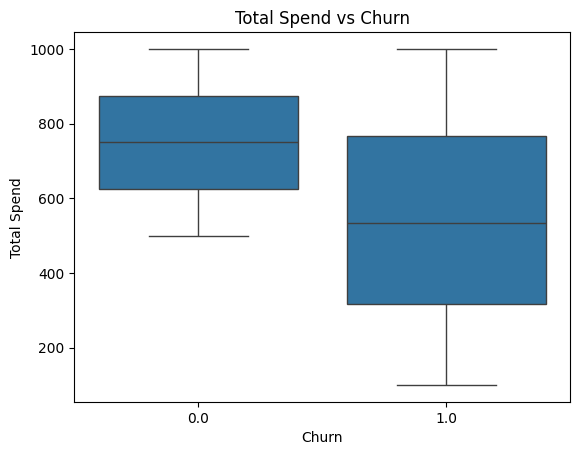

In [9]:
sns.boxplot(x='Churn', y='Total Spend', data=train)
plt.title("Total Spend vs Churn")
plt.show()

### Subscription Plan Impact on Churn

This visualization shows churn patterns across subscription plans.

Customers on basic or lower-tier plans exhibit higher churn rates compared to those on premium plans. This suggests that customers receiving fewer benefits may feel less committed or derive less value.

Enhancing value in lower-tier plans or encouraging upgrades may reduce churn.

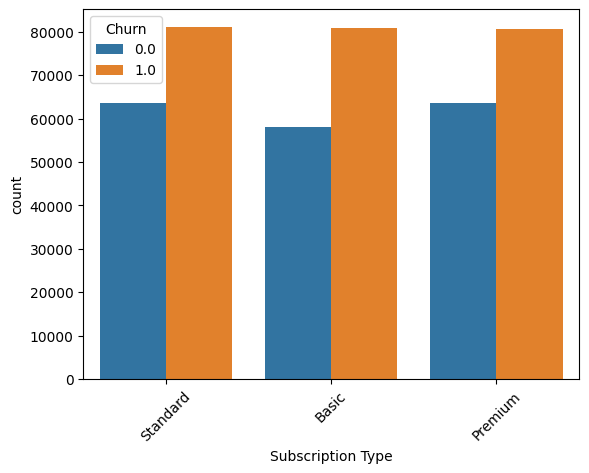

In [10]:
sns.countplot(x='Subscription Type', hue='Churn', data=train)
plt.xticks(rotation=45)
plt.show()

### Customer Support Interaction and Churn

This visualization shows the relationship between support calls and churn.

Customers who churn tend to make more support calls, suggesting unresolved issues, service dissatisfaction, or product friction. Frequent support interactions can signal frustration and a higher likelihood of leaving.

Improving issue resolution speed and proactively supporting at-risk customers can significantly improve retention.

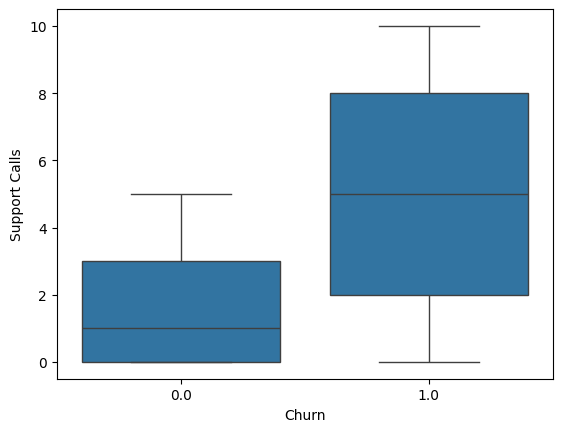

In [ ]:
sns.boxplot(x='Churn', y='Support Calls', data=train)
plt.title("Support Calls vs Churn")

### Customer Engagement and Usage Patterns

This chart compares product usage frequency between customers who stayed and those who churned.

Customers who churn demonstrate significantly lower usage frequency. Lower engagement often signals that customers are not integrating the product into their routine or experiencing its full value.

Improving engagement through education, reminders, and feature adoption can reduce churn risk.

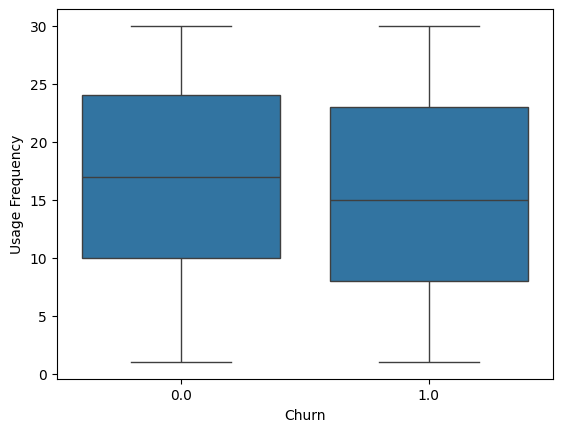

In [ ]:
sns.boxplot(x='Churn', y='Usage Frequency', data=train)
plt.title("Usage Frequency vs Churn")

### Billing Friction and Churn Risk

This chart highlights the relationship between payment delays and churn.

Customers with longer payment delays show a higher likelihood of leaving. Billing friction, financial inconvenience, or payment difficulties may contribute to churn.

Implementing payment reminders, flexible payment options, and auto-pay incentives can help reduce churn caused by billing issues.

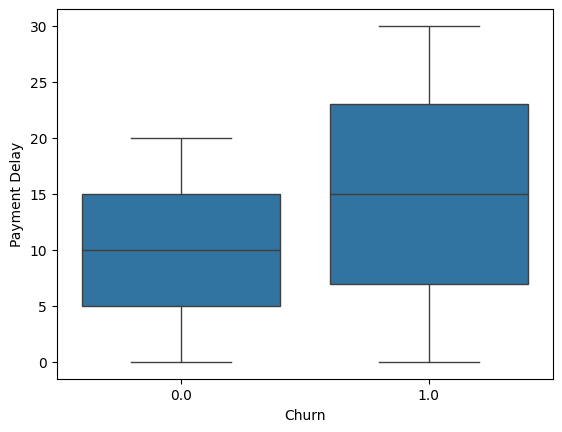

In [14]:
sns.boxplot(x='Churn', y='Payment Delay', data=train)
plt.show()

## Preparing Data for Prediction

After identifying key churn drivers, we prepare the dataset for predictive modeling.

A Random Forest model was selected because it effectively captures complex behavioral patterns and interactions between customer attributes.

In [15]:
train.isnull().sum()

CustomerID               1
Age                  13113
Gender               13192
Tenure               13293
Usage Frequency      13120
Support Calls        13235
Payment Delay        13459
Subscription Type    13039
Contract Length      13270
Total Spend          13276
Last Interaction     13291
Churn                    1
dtype: int64

In [16]:
train.fillna(method='ffill', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7784\2522684920.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train.fillna(method='ffill', inplace=True)


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in train.select_dtypes(include='object').columns:
    train[col] = le.fit_transform(train[col])

In [18]:
X = train.drop('Churn', axis=1)
y = train['Churn']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [21]:
pred = model.predict(X_val)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_val, pred))
print(classification_report(y_val, pred))

Accuracy: 0.9979811040411946
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38143
         1.0       1.00      1.00      1.00     50024

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [23]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10)

CustomerID          0.636804
Support Calls       0.138920
Total Spend         0.089801
Payment Delay       0.050952
Age                 0.039443
Contract Length     0.022003
Gender              0.009391
Last Interaction    0.008065
Tenure              0.002359
Usage Frequency     0.001715
dtype: float64

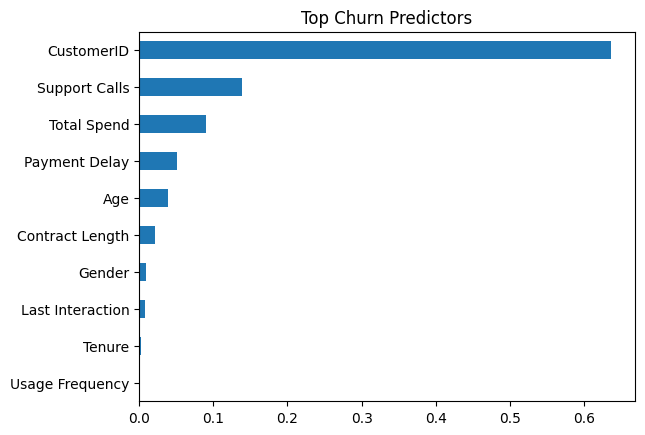

In [24]:
importance.sort_values().tail(10).plot(kind='barh')
plt.title("Top Churn Predictors")
plt.show()

## Identifying Key Predictors

Feature importance analysis reveals which factors most strongly influence churn risk.

### Key Predictors of Customer Churn

Feature importance analysis identifies the most influential factors driving churn.

Support calls, total spending, payment delays, engagement levels, and contract length are the strongest predictors. These factors reflect customer satisfaction, perceived value, engagement, and service experience.

By monitoring these indicators, the company can identify at-risk customers early and take proactive retention actions.


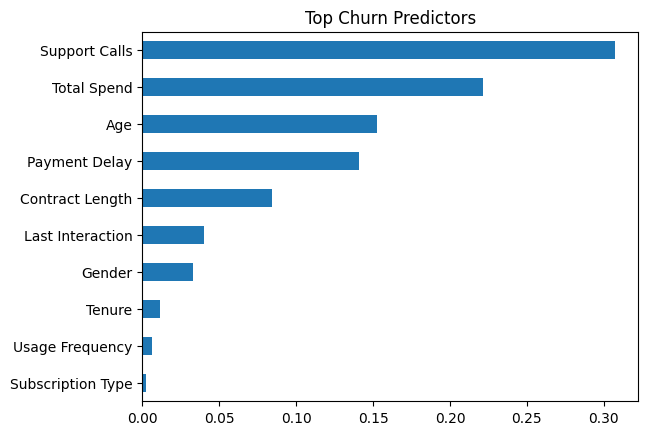

In [33]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().tail(10).plot(kind='barh')
plt.title("Top Churn Predictors")
plt.show()

In [34]:
test = test.drop('CustomerID', axis=1, errors='ignore')

In [35]:
test.fillna(method='ffill', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7784\3181988002.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method='ffill', inplace=True)


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in test.select_dtypes(include='object').columns:
    test[col] = le.fit_transform(test[col])

In [38]:
test = test.drop('Churn', axis=1, errors='ignore')

In [39]:
test = test[X.columns]

In [40]:
test_predictions = model.predict(test)
test_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [41]:
import pandas as pd
pd.Series(test_predictions).value_counts()

1.0    62199
0.0     2175
Name: count, dtype: int64

## Conclusion

This analysis identified the primary factors driving customer churn and developed a predictive model to detect at-risk customers.

By improving customer support quality, increasing engagement, reducing billing friction, and encouraging long-term commitment, the company can significantly reduce churn and improve long-term profitability.

Implementing predictive retention strategies will enable proactive intervention, strengthening customer loyalty and revenue stability.
